In [7]:
import pandas as pd
import numpy as np

# 读取几何参数数据
paras_df = pd.read_csv('E:/01_Graduate_projects/Cellular_structures/Multi-functional_design/Code_Project/Abaqus/paras3.csv')

# 读取力学结果数据
results_df = pd.read_csv('E:/01_Graduate_projects/Cellular_structures/Multi-functional_design/Code_Project/Abaqus/txt_path/results3.csv')

# 统一索引列名称并转换类型
results_df = results_df.rename(columns={'Index': 'index'})
paras_df['index'] = paras_df['index'].astype(int)
results_df['index'] = results_df['index'].astype(int)

# 合并数据（内连接确保只保留匹配项）
merged_df = pd.merge(paras_df, results_df, on='index', how='inner')

# 筛选 |Moduli| <= 100000 且 |Poisson Ratio| <= 5 的数据
filtered_df = merged_df[(abs(merged_df['Moduli']) <= 100000) & (abs(merged_df['Poisson Ratio']) <= 2)].copy()

# 使用 numpy 保存筛选后的结果
filtered_array = filtered_df.to_numpy()
header = ','.join(filtered_df.columns)

np.savetxt('E:/01_Graduate_projects/Cellular_structures/Multi-functional_design/Code_Project/ML/dataset/m_results3_1.csv', 
           filtered_array,
           delimiter=',',
           header=header,
           comments='',
           fmt='%s')

print("已筛选并保存数据至 ML/dataset/m_results3.csv")


已筛选并保存数据至 ML/dataset/m_results3.csv


0.2282575276704491
-0.6572995880705871
-0.5400762419758172
-0.46105275782959443
-0.26752774600464974


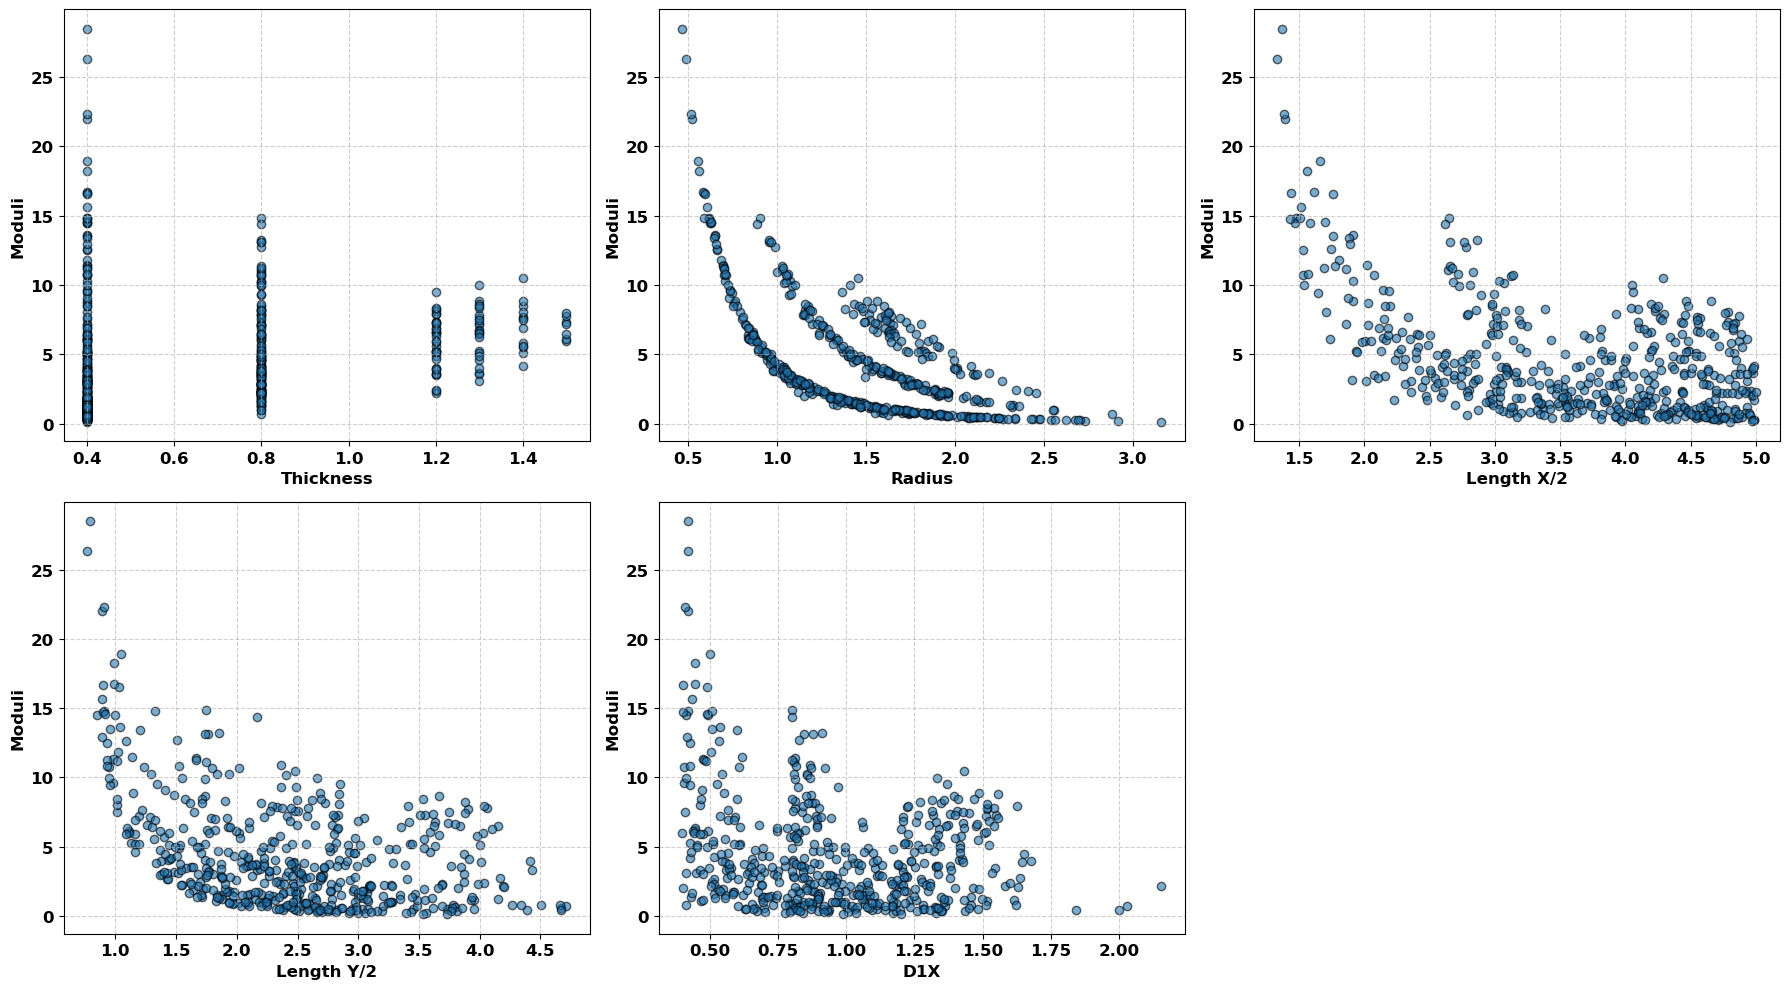

原始数据量: 512
筛选后数据量: 512
筛选掉的数据点数量: 0


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

plt.rcParams.update({
    'font.weight': 'bold',            # 加粗字体
    'axes.labelweight': 'bold',       # 加粗坐标轴标签
    'axes.titlesize': 12,             # 增加标题的字体大小
    'axes.labelsize': 12,             # 增加坐标轴标签字体大小
    'xtick.labelsize': 12,            # 增加X轴刻度字体大小
    'ytick.labelsize': 12,            # 增加Y轴刻度字体大小
    'legend.fontsize': 12,            # 增加图例字体大小
    'axes.titleweight': 'bold',       # 标题加粗
})

# 读取合并后的数据
data = pd.read_csv('E:/01_Graduate_projects/Cellular_structures/Multi-functional_design/Code_Project/ML/dataset/m_results3.csv')

# 筛选掉 |Moduli| > 10000 的数据点
filtered_data = data[abs(data['Moduli']) <= 100000].copy()

# 设置绘图参数
plt.figure(figsize=(18, 10))

# 要分析的几何参数列表
geometric_params = ['thickness', 'radius', 'length_x/2', 'length_y/2', 'd']
titles = ['Thickness', 'Radius', 'Length X/2', 'Length Y/2', 'D1X']

# 创建子图
for i, (param, title) in enumerate(zip(geometric_params, titles), 1):
    ax = plt.subplot(2, 3, i)
    
    # 绘制散点图
    ax.scatter(filtered_data[param], filtered_data['Moduli'], alpha=0.6, edgecolor='k')
    
    # 计算皮尔逊相关系数
    corr, p_value = pearsonr(filtered_data[param], filtered_data['Moduli'])
    

    
    # 添加标签和标题
    ax.set_xlabel(title, fontsize=12)
    ax.set_ylabel('Moduli', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # 禁用科学计数法
    ax.ticklabel_format(style='plain', useOffset=False)
    print(corr)

# 调整子图间距
plt.tight_layout()

# 保存图像
plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# 输出筛选前后的数据量对比
print(f"原始数据量: {len(data)}")
print(f"筛选后数据量: {len(filtered_data)}")
print(f"筛选掉的数据点数量: {len(data) - len(filtered_data)}")

0.19688843670506476
0.16107298063089603
0.05264558490986786
0.6199544765275691
0.3719468355434211


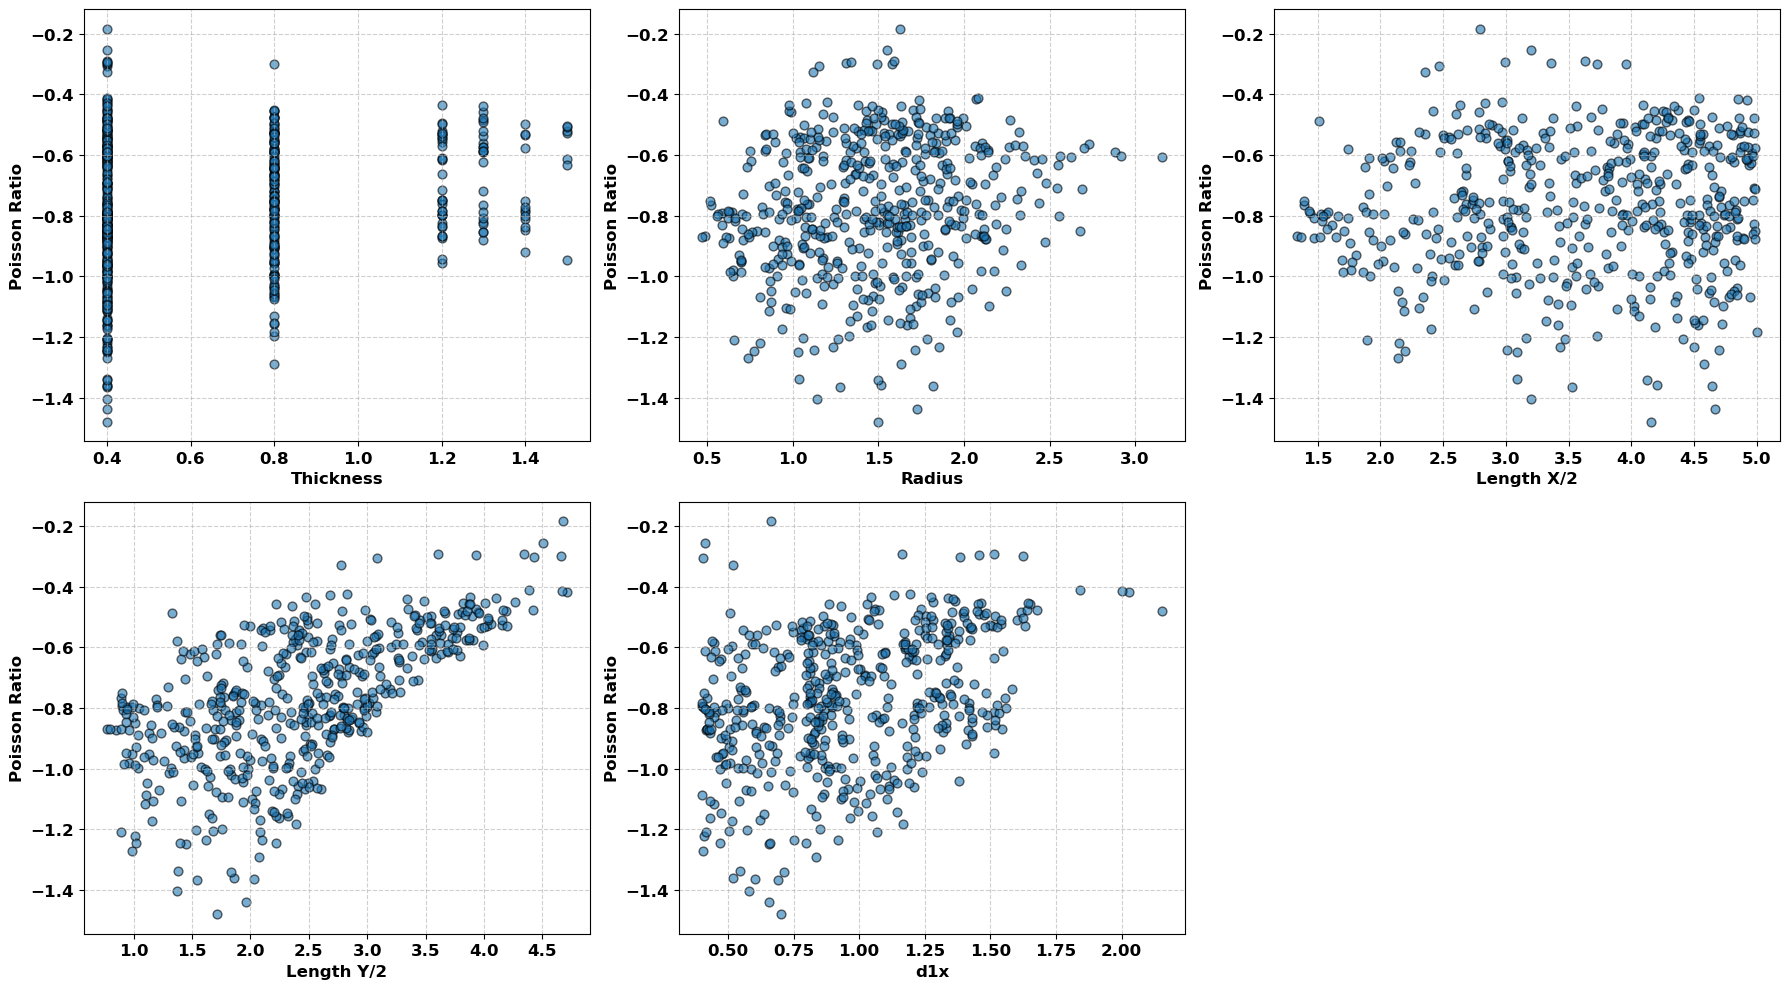

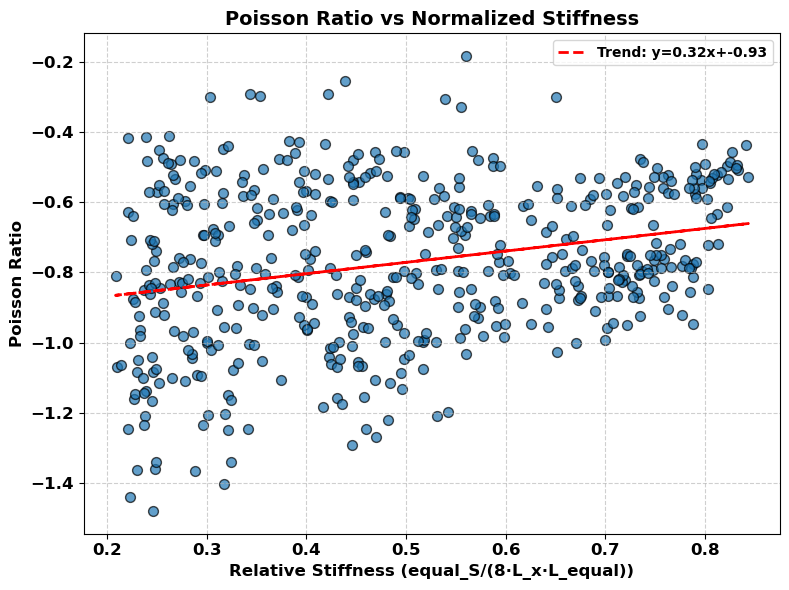


[数据验证]
计算公式：equal_S / (8 * length_x/2 * equal_length)
示例计算（第一行）：
490.7191 / (8 * 3.4897 * 55.8357) = 0.314806

Relative_S统计：
count    512.000000
mean       0.498589
std        0.185061
min        0.208336
25%        0.329192
50%        0.481588
75%        0.670110
max        0.843790
Name: Relative_S, dtype: float64


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置全局绘图样式
plt.rcParams.update({
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titleweight': 'bold',
})

# 读取数据
data = pd.read_csv('E:/01_Graduate_projects/Cellular_structures/Multi-functional_design/Code_Project/ML/dataset/m_results3.csv')

# 筛选有效数据
filtered_data = data[abs(data['Poisson Ratio']) <= 100000].copy()

# 修正Relative_S计算公式（按最新要求）
filtered_data['Relative_S'] = filtered_data['equal_S'] / (8 * filtered_data['length_x/2'] * filtered_data['equal_length'])

# ============= 原始几何参数分析图 =============
plt.figure(figsize=(18, 10))
geometric_params = ['thickness', 'radius', 'length_x/2', 'length_y/2', 'd']
titles = ['Thickness', 'Radius', 'Length X/2', 'Length Y/2', 'd1x']

for i, (param, title) in enumerate(zip(geometric_params, titles), 1):
    ax = plt.subplot(2, 3, i)
    ax.scatter(filtered_data[param], filtered_data['Poisson Ratio'], 
               alpha=0.6, edgecolor='k', s=40)
    corr, p_value = pearsonr(filtered_data[param], filtered_data['Poisson Ratio'])
    print(corr)
    ax.set_xlabel(title, fontsize=12)
    ax.set_ylabel('Poisson Ratio', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.ticklabel_format(style='plain', useOffset=False)

plt.tight_layout()
plt.show()

# ============= 新增：Relative_S与Poisson Ratio关系图 =============
plt.figure(figsize=(8, 6))
ax = plt.gca()
sc = ax.scatter(filtered_data['Relative_S'], filtered_data['Poisson Ratio'], 
                alpha=0.7, edgecolor='k', c='#1f77b4', s=50)
ax.set_xlabel('Relative Stiffness (equal_S/(8·L_x·L_equal))', fontsize=12)
ax.set_ylabel('Poisson Ratio', fontsize=12)
ax.set_title('Poisson Ratio vs Normalized Stiffness', fontsize=14, weight='bold')
ax.grid(True, linestyle='--', alpha=0.6)

# 添加趋势线（红色虚线）
if not filtered_data['Relative_S'].empty:
    z = np.polyfit(filtered_data['Relative_S'], filtered_data['Poisson Ratio'], 1)
    p = np.poly1d(z)
    plt.plot(filtered_data['Relative_S'], p(filtered_data['Relative_S']), 
             "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

# 数据统计验证
print("\n[数据验证]")
print(f"计算公式：equal_S / (8 * length_x/2 * equal_length)")
print(f"示例计算（第一行）：")
print(f"{filtered_data['equal_S'].iloc[0]} / (8 * {filtered_data['length_x/2'].iloc[0]} * {filtered_data['equal_length'].iloc[0]}) = {filtered_data['Relative_S'].iloc[0]:.6f}")
print(f"\nRelative_S统计：")
print(filtered_data['Relative_S'].describe())

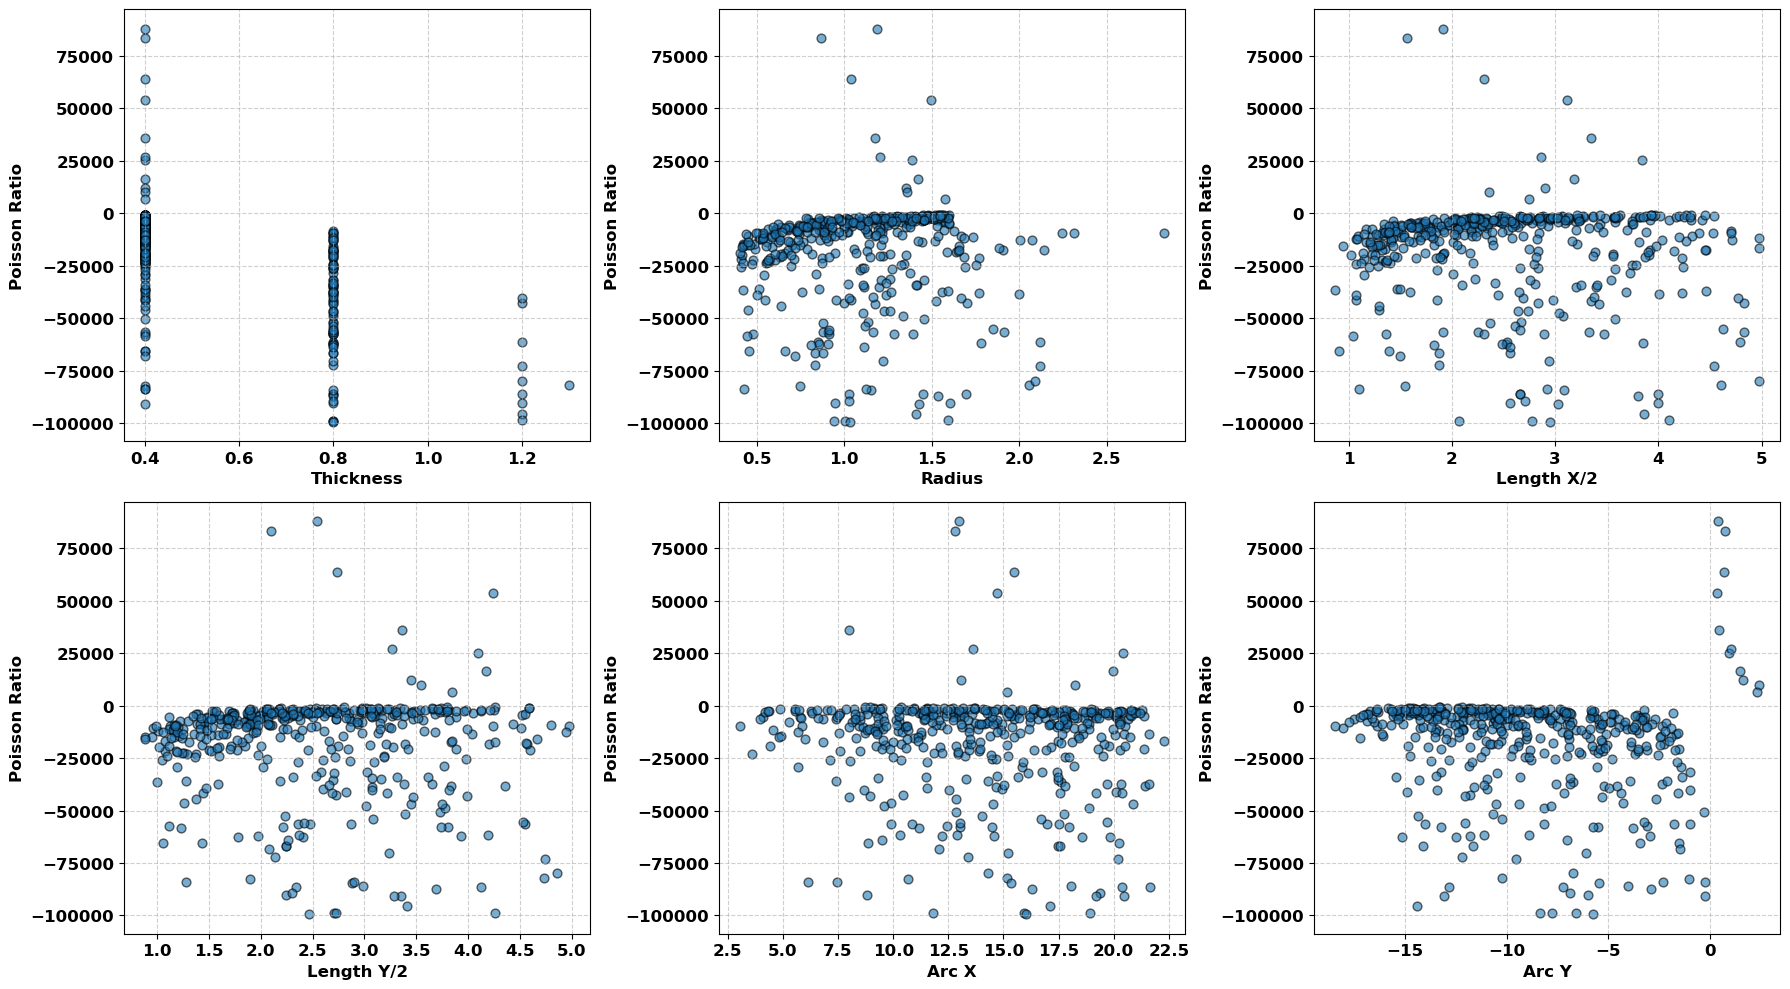

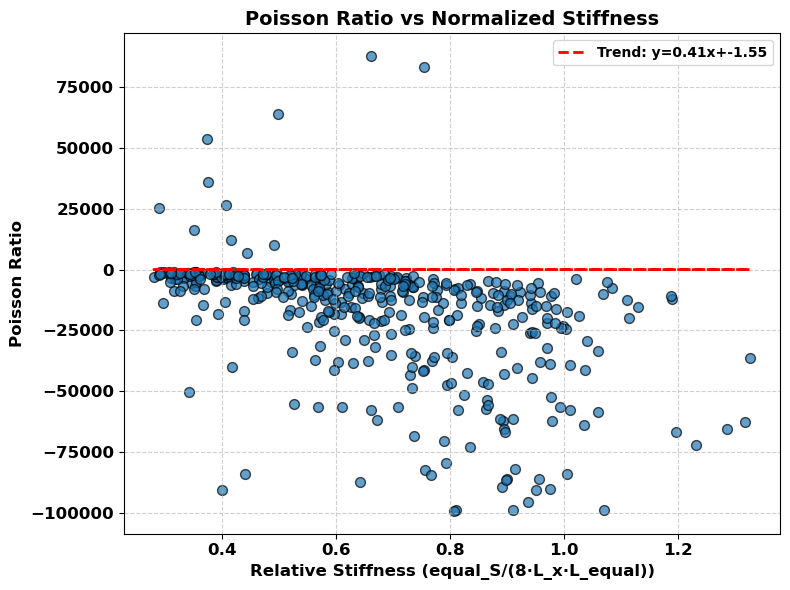


[数据验证]
计算公式：equal_S / (8 * length_x/2 * equal_length)
示例计算（第一行）：
565.836 / (8 * 1.5417 * 60.6303) = 0.756678

Relative_S统计：
count    435.000000
mean       0.653673
std        0.222245
min        0.279887
25%        0.475737
50%        0.634880
75%        0.813852
max        1.326829
Name: Relative_S, dtype: float64


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置全局绘图样式
plt.rcParams.update({
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titleweight': 'bold',
})

# 读取数据
data = pd.read_csv('E:/01_Graduate_projects/Cellular_structures/Multi-functional_design/Code_Project/ML/dataset/m_results.csv')

# 筛选有效数据
filtered_data = data[abs(data['Moduli']) <= 100000].copy()

# 修正Relative_S计算公式（按最新要求）
filtered_data['Relative_S'] = filtered_data['equal_S'] / (8 * filtered_data['length_x/2'] * filtered_data['equal_length'])

# ============= 原始几何参数分析图 =============
plt.figure(figsize=(18, 10))
geometric_params = ['thickness', 'radius', 'length_x/2', 'length_y/2', 'arc_x', 'arc_y']
titles = ['Thickness', 'Radius', 'Length X/2', 'Length Y/2', 'Arc X', 'Arc Y']

for i, (param, title) in enumerate(zip(geometric_params, titles), 1):
    ax = plt.subplot(2, 3, i)
    ax.scatter(filtered_data[param], filtered_data['Moduli'], 
               alpha=0.6, edgecolor='k', s=40)
    ax.set_xlabel(title, fontsize=12)
    ax.set_ylabel('Poisson Ratio', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.ticklabel_format(style='plain', useOffset=False)

plt.tight_layout()
plt.show()

# ============= 新增：Relative_S与Poisson Ratio关系图 =============
plt.figure(figsize=(8, 6))
ax = plt.gca()
sc = ax.scatter(filtered_data['Relative_S'], filtered_data['Moduli'], 
                alpha=0.7, edgecolor='k', c='#1f77b4', s=50)
ax.set_xlabel('Relative Stiffness (equal_S/(8·L_x·L_equal))', fontsize=12)
ax.set_ylabel('Poisson Ratio', fontsize=12)
ax.set_title('Poisson Ratio vs Normalized Stiffness', fontsize=14, weight='bold')
ax.grid(True, linestyle='--', alpha=0.6)

# 添加趋势线（红色虚线）
if not filtered_data['Relative_S'].empty:
    z = np.polyfit(filtered_data['Relative_S'], filtered_data['Poisson Ratio'], 1)
    p = np.poly1d(z)
    plt.plot(filtered_data['Relative_S'], p(filtered_data['Relative_S']), 
             "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

# 数据统计验证
print("\n[数据验证]")
print(f"计算公式：equal_S / (8 * length_x/2 * equal_length)")
print(f"示例计算（第一行）：")
print(f"{filtered_data['equal_S'].iloc[0]} / (8 * {filtered_data['length_x/2'].iloc[0]} * {filtered_data['equal_length'].iloc[0]}) = {filtered_data['Relative_S'].iloc[0]:.6f}")
print(f"\nRelative_S统计：")
print(filtered_data['Relative_S'].describe())

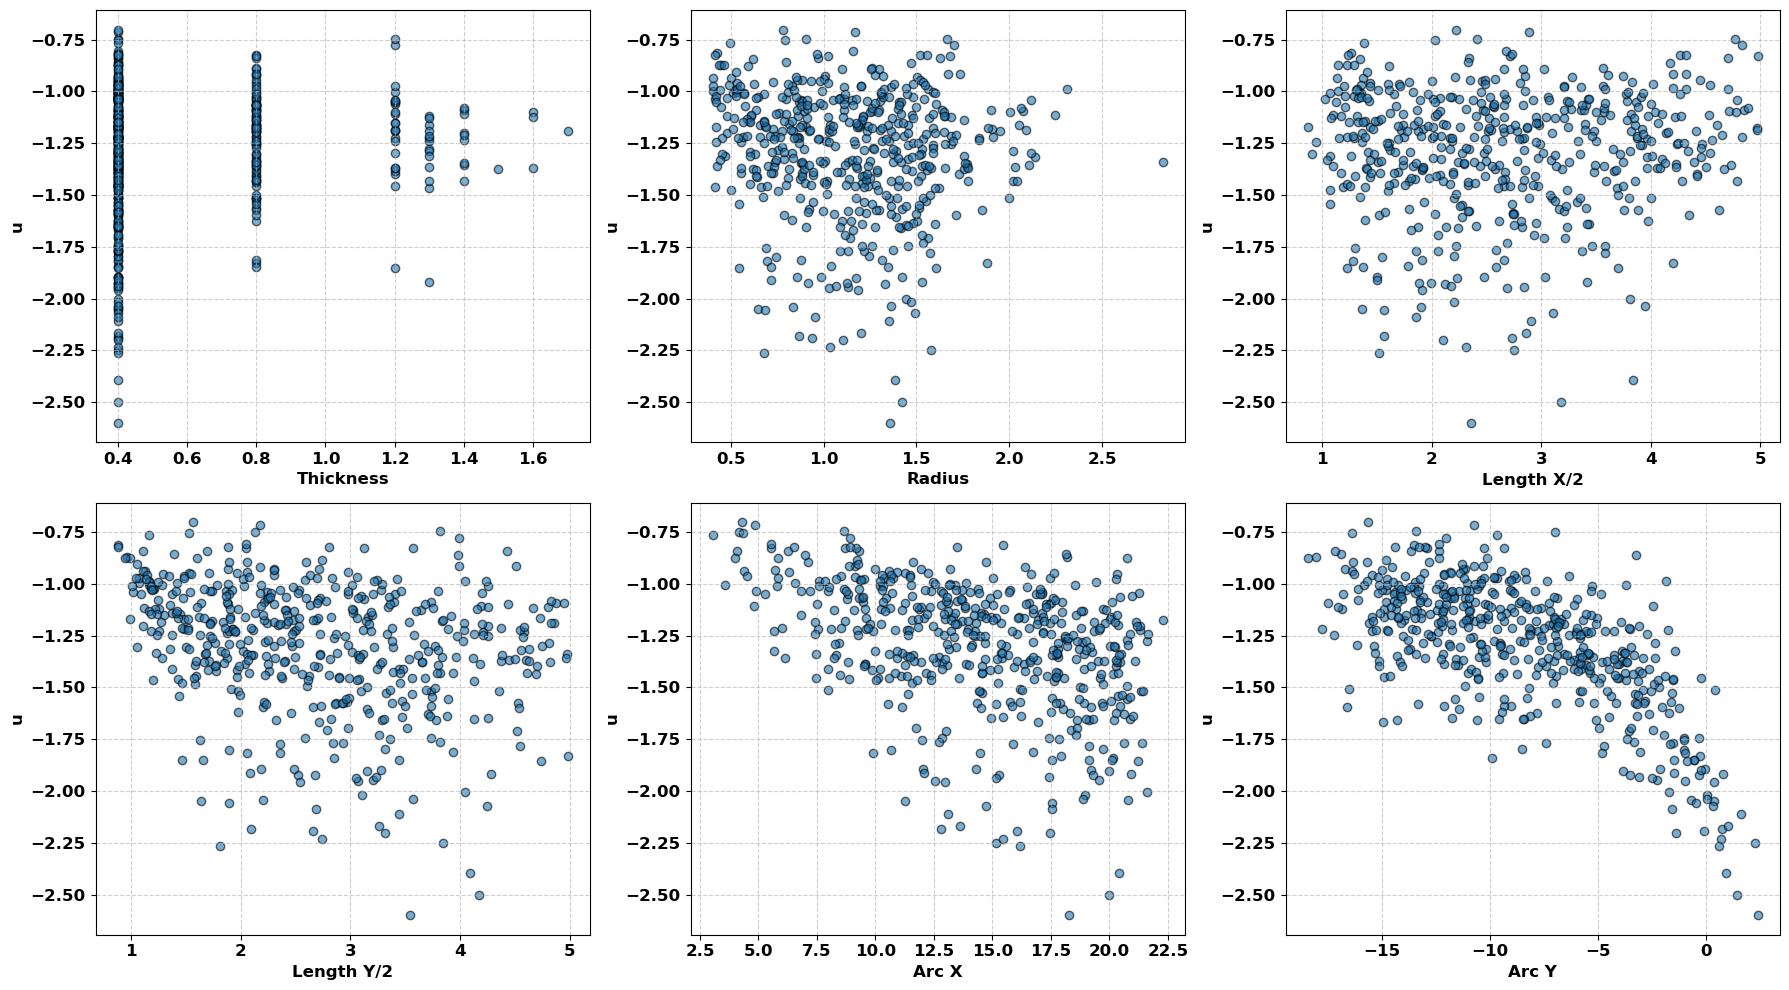

原始数据量: 500
筛选后数据量: 500
筛选掉的数据点数量: 0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.weight': 'bold',            # 加粗字体
    'axes.labelweight': 'bold',       # 加粗坐标轴标签
    'axes.titlesize': 12,             # 增加标题的字体大小
    'axes.labelsize': 12,             # 增加坐标轴标签字体大小
    'xtick.labelsize': 12,            # 增加X轴刻度字体大小
    'ytick.labelsize': 12,            # 增加Y轴刻度字体大小
    'legend.fontsize': 12,            # 增加图例字体大小
    'axes.titleweight': 'bold',        # 标题加粗
})
# 读取合并后的数据
data = pd.read_csv('E:/01_Graduate_projects\Cellular_structures\Multi-functional_design\Code_Project\ML\dataset/m_results.csv')


# 筛选掉 |Moduli| > 10000 的数据点
filtered_data = data[abs(data['Poisson Ratio']) <= 100000].copy()

# 设置绘图参数
plt.figure(figsize=(18, 10))


# 要分析的几何参数列表
geometric_params = ['thickness', 'radius', 'length_x/2', 'length_y/2', 'arc_x', 'arc_y']
titles = ['Thickness', 'Radius', 'Length X/2', 'Length Y/2', 'Arc X', 'Arc Y']

# 创建6个子图
for i, (param, title) in enumerate(zip(geometric_params, titles), 1):
    ax = plt.subplot(2, 3, i)
    
    # 绘制散点图
    ax.scatter(filtered_data[param], filtered_data['Poisson Ratio'], alpha=0.6, edgecolor='k')
    
    # 添加标签和标题
    ax.set_xlabel(title, fontsize=12)
    ax.set_ylabel('u', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # 禁用科学计数法
    ax.ticklabel_format(style='plain', useOffset=False)

# 调整子图间距
plt.tight_layout()

# 保存图像

plt.show()

# 输出筛选前后的数据量对比
print(f"原始数据量: {len(data)}")
print(f"筛选后数据量: {len(filtered_data)}")
print(f"筛选掉的数据点数量: {len(data) - len(filtered_data)}")